<a href="https://colab.research.google.com/github/Laura9704/20251/blob/main/TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#llamado de la informacion
#info del punto 2 clasificacion
data1 = pd.read_excel('/content/drive/MyDrive/Taller_practico/BD_IPSA_1940.xlsx')
#info del punto 1 regresion
data2 = pd.read_excel('/content/drive/MyDrive/Taller_practico/HISTORICO_SUERTES.xlsx')

**F.Ult.Corte (Fecha del Último Corte)** :Indica la fecha del último corte o cosecha, permitiendo determinar el ciclo de crecimiento del cultivo, planificar futuras cosechas y evaluar la rotación del cultivo. Además, ayuda a identificar la frecuencia de cosecha, lo que influye en la predicción del rendimiento (**TCH, TAH, Ton.Azúcar**), dado que el tiempo entre cortes afecta la acumulación de biomasa y sacarosa. En modelos de regresión, esta variable puede utilizarse para estimar el crecimiento de la caña en función del tiempo transcurrido desde la última cosecha. **(Fuente: CENICAÑA, 1993)**  

**Destino (1 = Semilla)**: Indica si el cultivo fue destinado a semilla u otro uso. Un valor de "1" señala que el destino del cultivo fue semilla. Los cultivos destinados a semilla pueden mostrar menores valores de **TCH** y **TAH**, ya que su manejo es diferente al de la producción comercial. En modelos de regresión, esta variable puede incluirse como un factor categórico para ajustar la predicción del rendimiento.**(Fuente: CENICAÑA, 1993)**  

**Cod. T.Cultivo y Cultivo**: Representa el código y el nombre del cultivo plantado, permitiendo segmentar datos para modelado específico según la variedad de caña (convencional u orgánica). La variedad influye en el rendimiento, el contenido de azúcar y la respuesta a fertilización y maduración. Modelos de regresión pueden incorporar esta variable como un factor categórico para mejorar la precisión de las predicciones según la variedad.  **(Fuente: CENICAÑA, 1993)**  

**Dosis Madurante** : Indica la cantidad de insumo (fertilizante o agroquímico) aplicada durante el periodo de maduración. Estudios han demostrado que la aplicación de madurantes incrementa la concentración de azúcar en la caña, impactando **TAH** y **Ton.Azúcar**. En modelos de regresión, esta variable puede mejorar la precisión en la predicción del contenido de azúcar. **(Fuente: CENGICANA, 2020)**  

**TonUltCorte (Toneladas del Último Corte)** : Representa la cantidad de toneladas obtenidas en el último corte o cosecha. Es una variable clave en modelos de regresión lineal múltiple, ya que el rendimiento previo es un fuerte predictor del rendimiento futuro. Permite evaluar tendencias productivas y ajustar las expectativas de cosecha. **(Fuente: CENICAÑA, 1993)**  

**TCH (Toneladas de Caña por Hectárea)** : Es la variable dependiente principal en modelos de regresión para predecir la productividad del cultivo, ya que está directamente relacionada con la edad del cultivo, dosis de fertilización, aplicación de madurantes y condiciones ambientales.  **(Fuente: CENICAÑA, 1993)**  

**TAH (Toneladas de Azúcar por Hectárea)**: Mide la eficiencia del cultivo y se calcula mediante la fórmula:  **TAH = TCH × RDTO**  
Dado que depende de **TCH** y del rendimiento de extracción de azúcar (**RDTO**), su modelado requiere estimaciones precisas de ambas variables. **(Fuente: CENICAÑA, 1993)**  

**Ton.Azúcar (Toneladas de Azúcar Extraídas)**: Mide la eficiencia en la extracción de azúcar y es fundamental para evaluar la rentabilidad del cultivo. Su valor está influenciado por la variedad de caña, la dosis de madurante y el rendimiento de la cosecha. Modelos de regresión pueden predecir este valor a partir de **TCH, RDTO y Dosis Madurante**. **(Fuente: CENICAÑA, 1993)**  

**TCHM y TAHM (Rendimiento Mensual de Caña y Azúcar por Hectárea)**: Permiten estimar la productividad mensual y facilitar ajustes en la planificación agrícola. En modelos de regresión, estos datos pueden utilizarse para evaluar tendencias estacionales en la producción. **(Fuente: CENICAÑA, 1993)**  

**RDTO (Rendimiento de Azúcar Recuperable por Unidad de Caña)**: Evalúa la eficiencia y productividad del cultivo en su conjunto, integrando múltiples factores. Está relacionado con **Dosis Madurante** y **TonUltCorte**. En modelos de regresión múltiple, esta variable puede mejorar la predicción de **TAH** y **Ton.Azúcar**.  **(Fuente: CENICAÑA, 1993)**  


In [67]:
X = data2[['F.Ult.Corte', 'Destino 1=Semilla', 'Cod. T.Cultivo', 'Cultivo', 'Dosis Madurante','TonUltCorte', 'TCH',
           'TCHM', 'Ton.Azucar', 'Rdto', 'TAH', 'TAHM',]]
f= X.copy()

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   F.Ult.Corte        21027 non-null  datetime64[ns]
 1   Destino 1=Semilla  21027 non-null  int64         
 2   Cod. T.Cultivo     21025 non-null  float64       
 3   Cultivo            21025 non-null  object        
 4   Dosis Madurante    20923 non-null  float64       
 5   TonUltCorte        21027 non-null  float64       
 6   TCH                21027 non-null  float64       
 7   TCHM               21027 non-null  float64       
 8   Ton.Azucar         20786 non-null  float64       
 9   Rdto               20760 non-null  float64       
 10  TAH                20786 non-null  float64       
 11  TAHM               20786 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int64(1), object(1)
memory usage: 1.9+ MB


In [ ]:
X.describe().round(3)

,F.Ult.Corte,Destino 1=Semilla,Cod. T.Cultivo,Dosis Madurante,TonUltCorte,TCH,TCHM,Ton.Azucar,Rdto,TAH,TAHM
count,21027,21027.000,21025.000,20923.000,21027.000,21027.000,21027.000,20786.000,20760.000,20786.000,20786.000
mean,2020-10-27 09:01:09.339420672,0.014,1.036,0.536,1141.737,129.609,10.050,124.249,10.734,13.889,1.071
min,2017-01-02 00:00:00,0.000,1.000,0.000,0.420,1.574,0.138,0.000,0.000,0.000,0.000
25%,2018-12-14 00:00:00,0.000,1.000,0.000,398.442,108.691,8.463,42.282,10.117,11.690,0.909
50%,2020-10-11 00:00:00,0.000,1.000,0.600,870.030,129.480,10.089,93.736,10.891,14.015,1.088
75%,2022-09-25 00:00:00,0.000,1.000,1.000,1591.720,150.408,11.649,173.922,11.598,16.298,1.253
max,2024-07-10 00:00:00,1.000,2.000,5.000,13586.140,401.046,60.096,1312.973,15.894,72.168,5.192
std,NaN,0.117,0.187,0.540,1018.073,32.846,2.503,111.843,1.517,3.805,0.285


Graficos

En general hay varias variables que tiene datos atipicos, y que tiene un desblance en los registros. ademas hay varaibles que tiene valores en tipo clase como T.cultivo que es 1 o 2,por lo cual sus graficos muestran tendencias extremas en la representacion

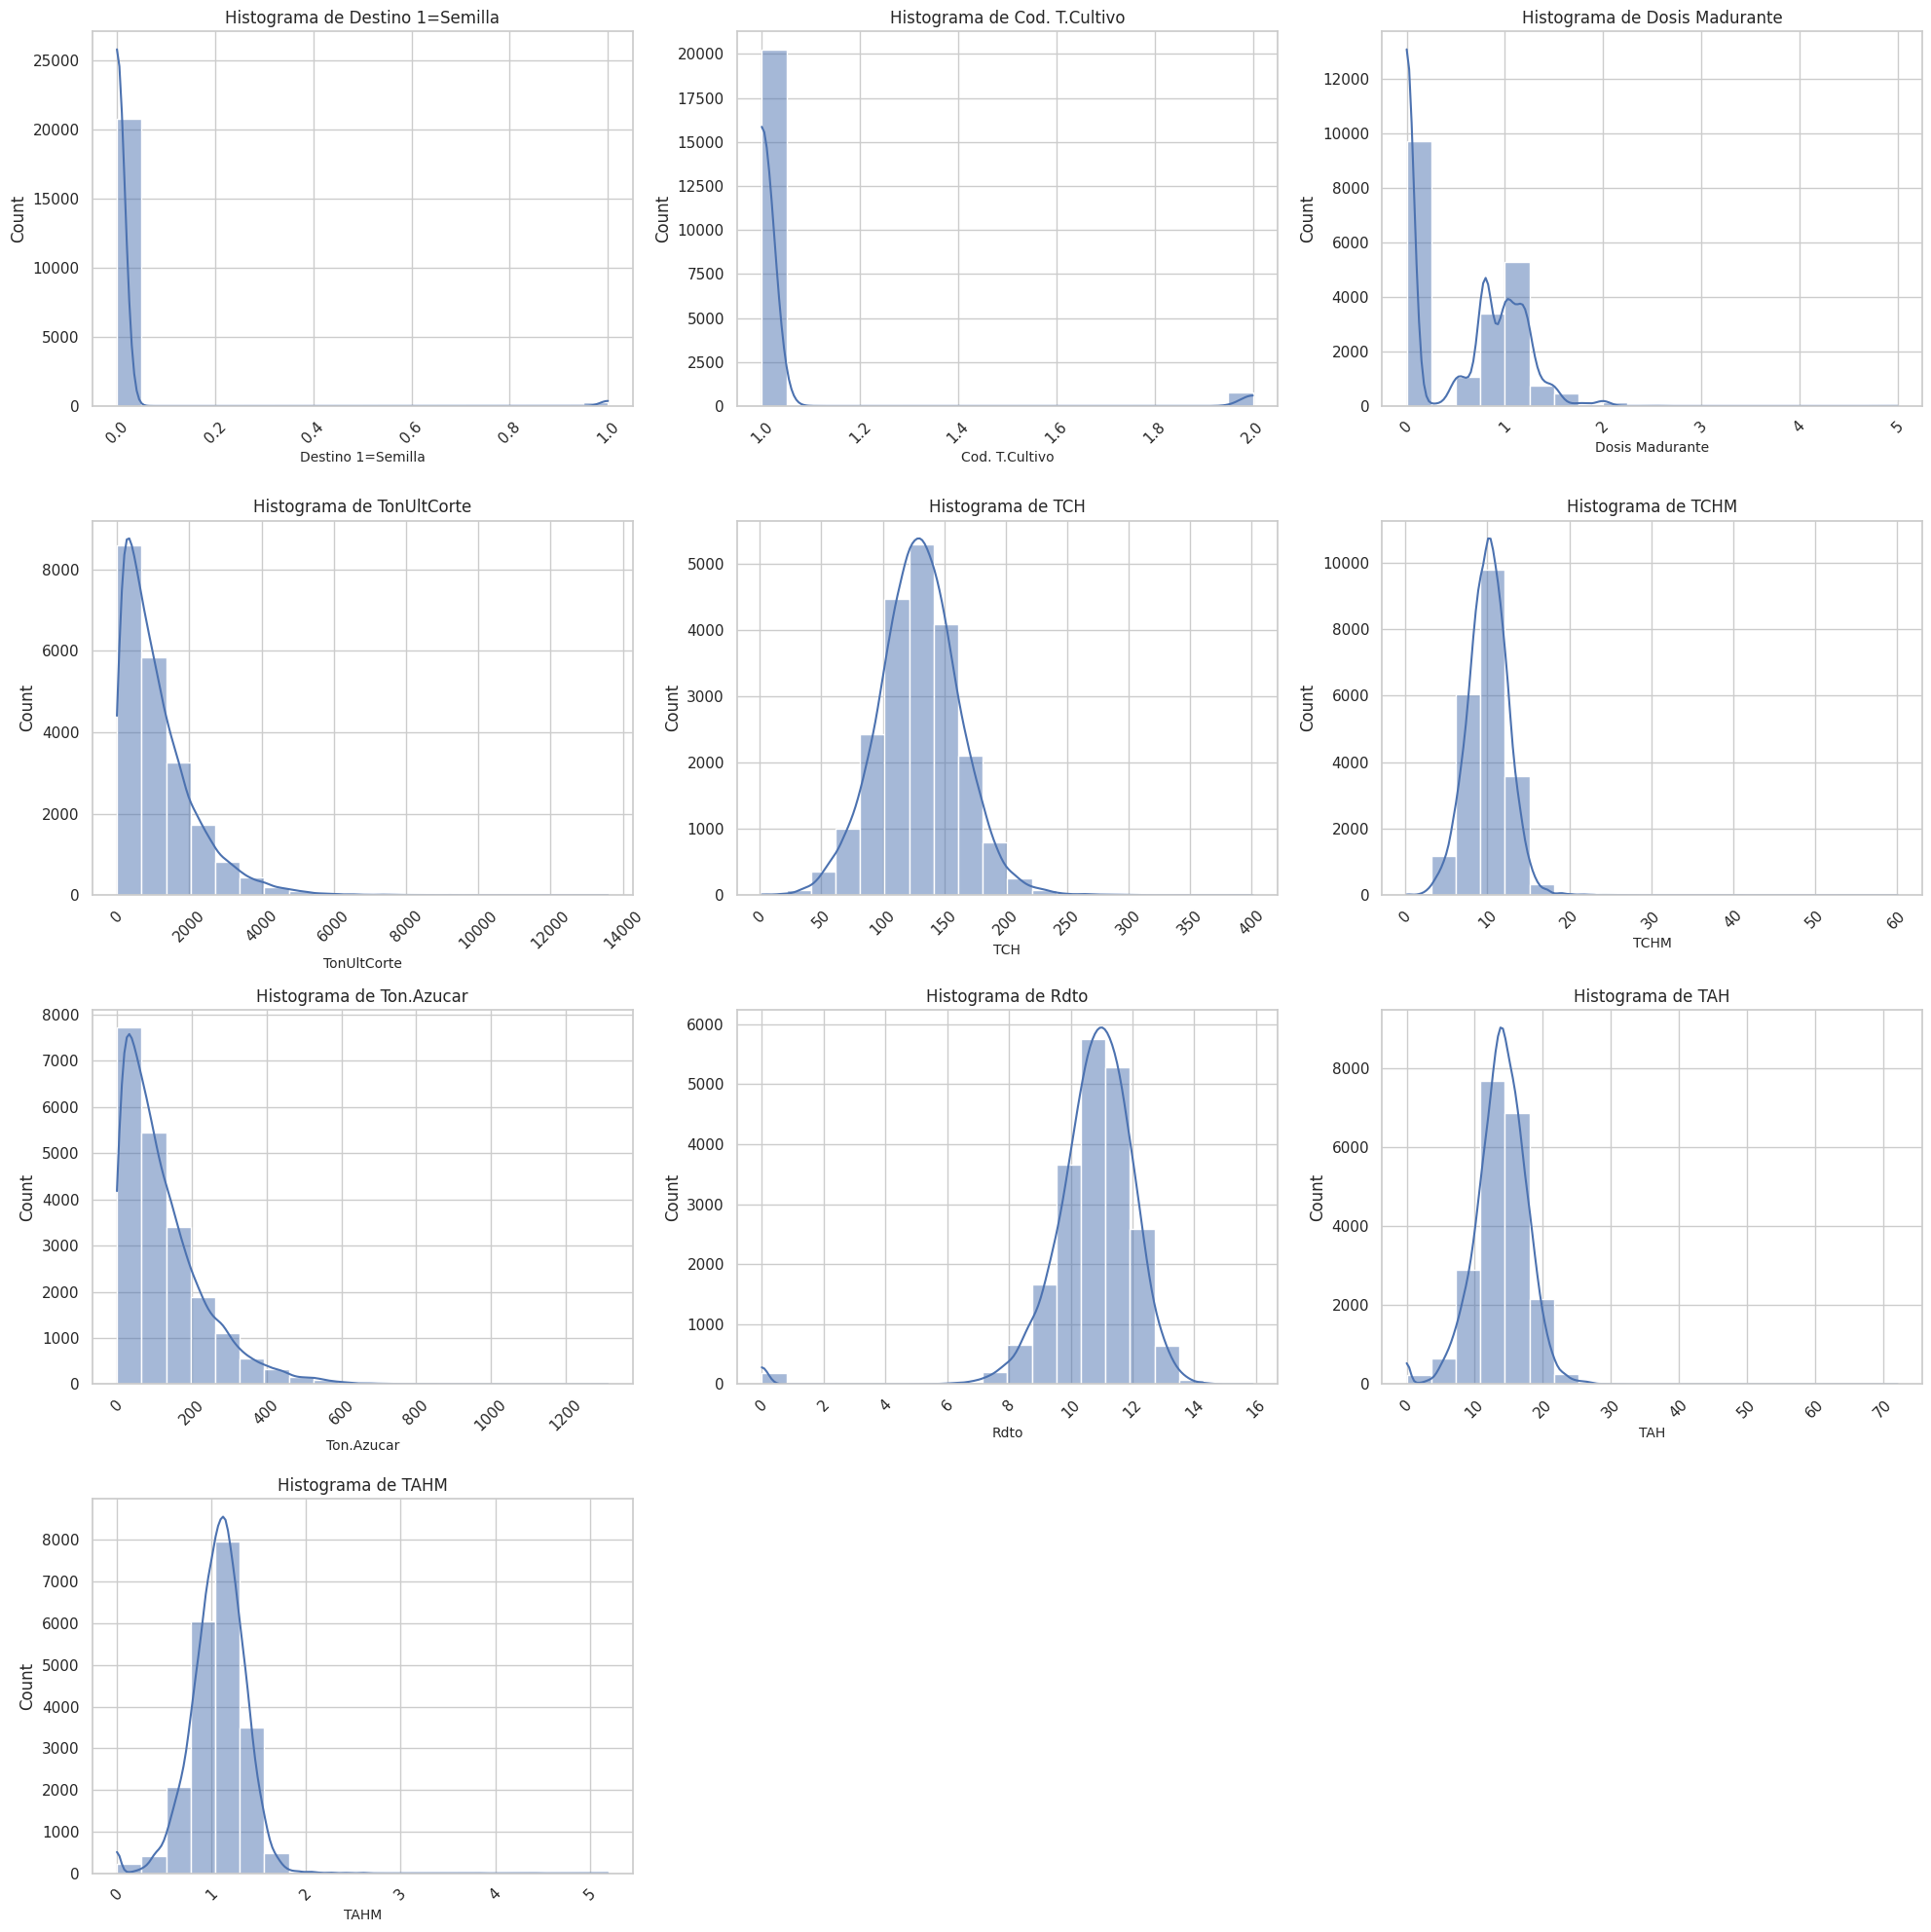

In [ ]:
Xn = X.select_dtypes(include=[np.number])
num_vars = len(Xn.columns)
cols = 3
rows = int(np.ceil(num_vars / cols))
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()  # Convertir a una lista de ejes
for i, col in enumerate(Xn.columns):
    sns.histplot(X[col], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f"Histograma de {col}", fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

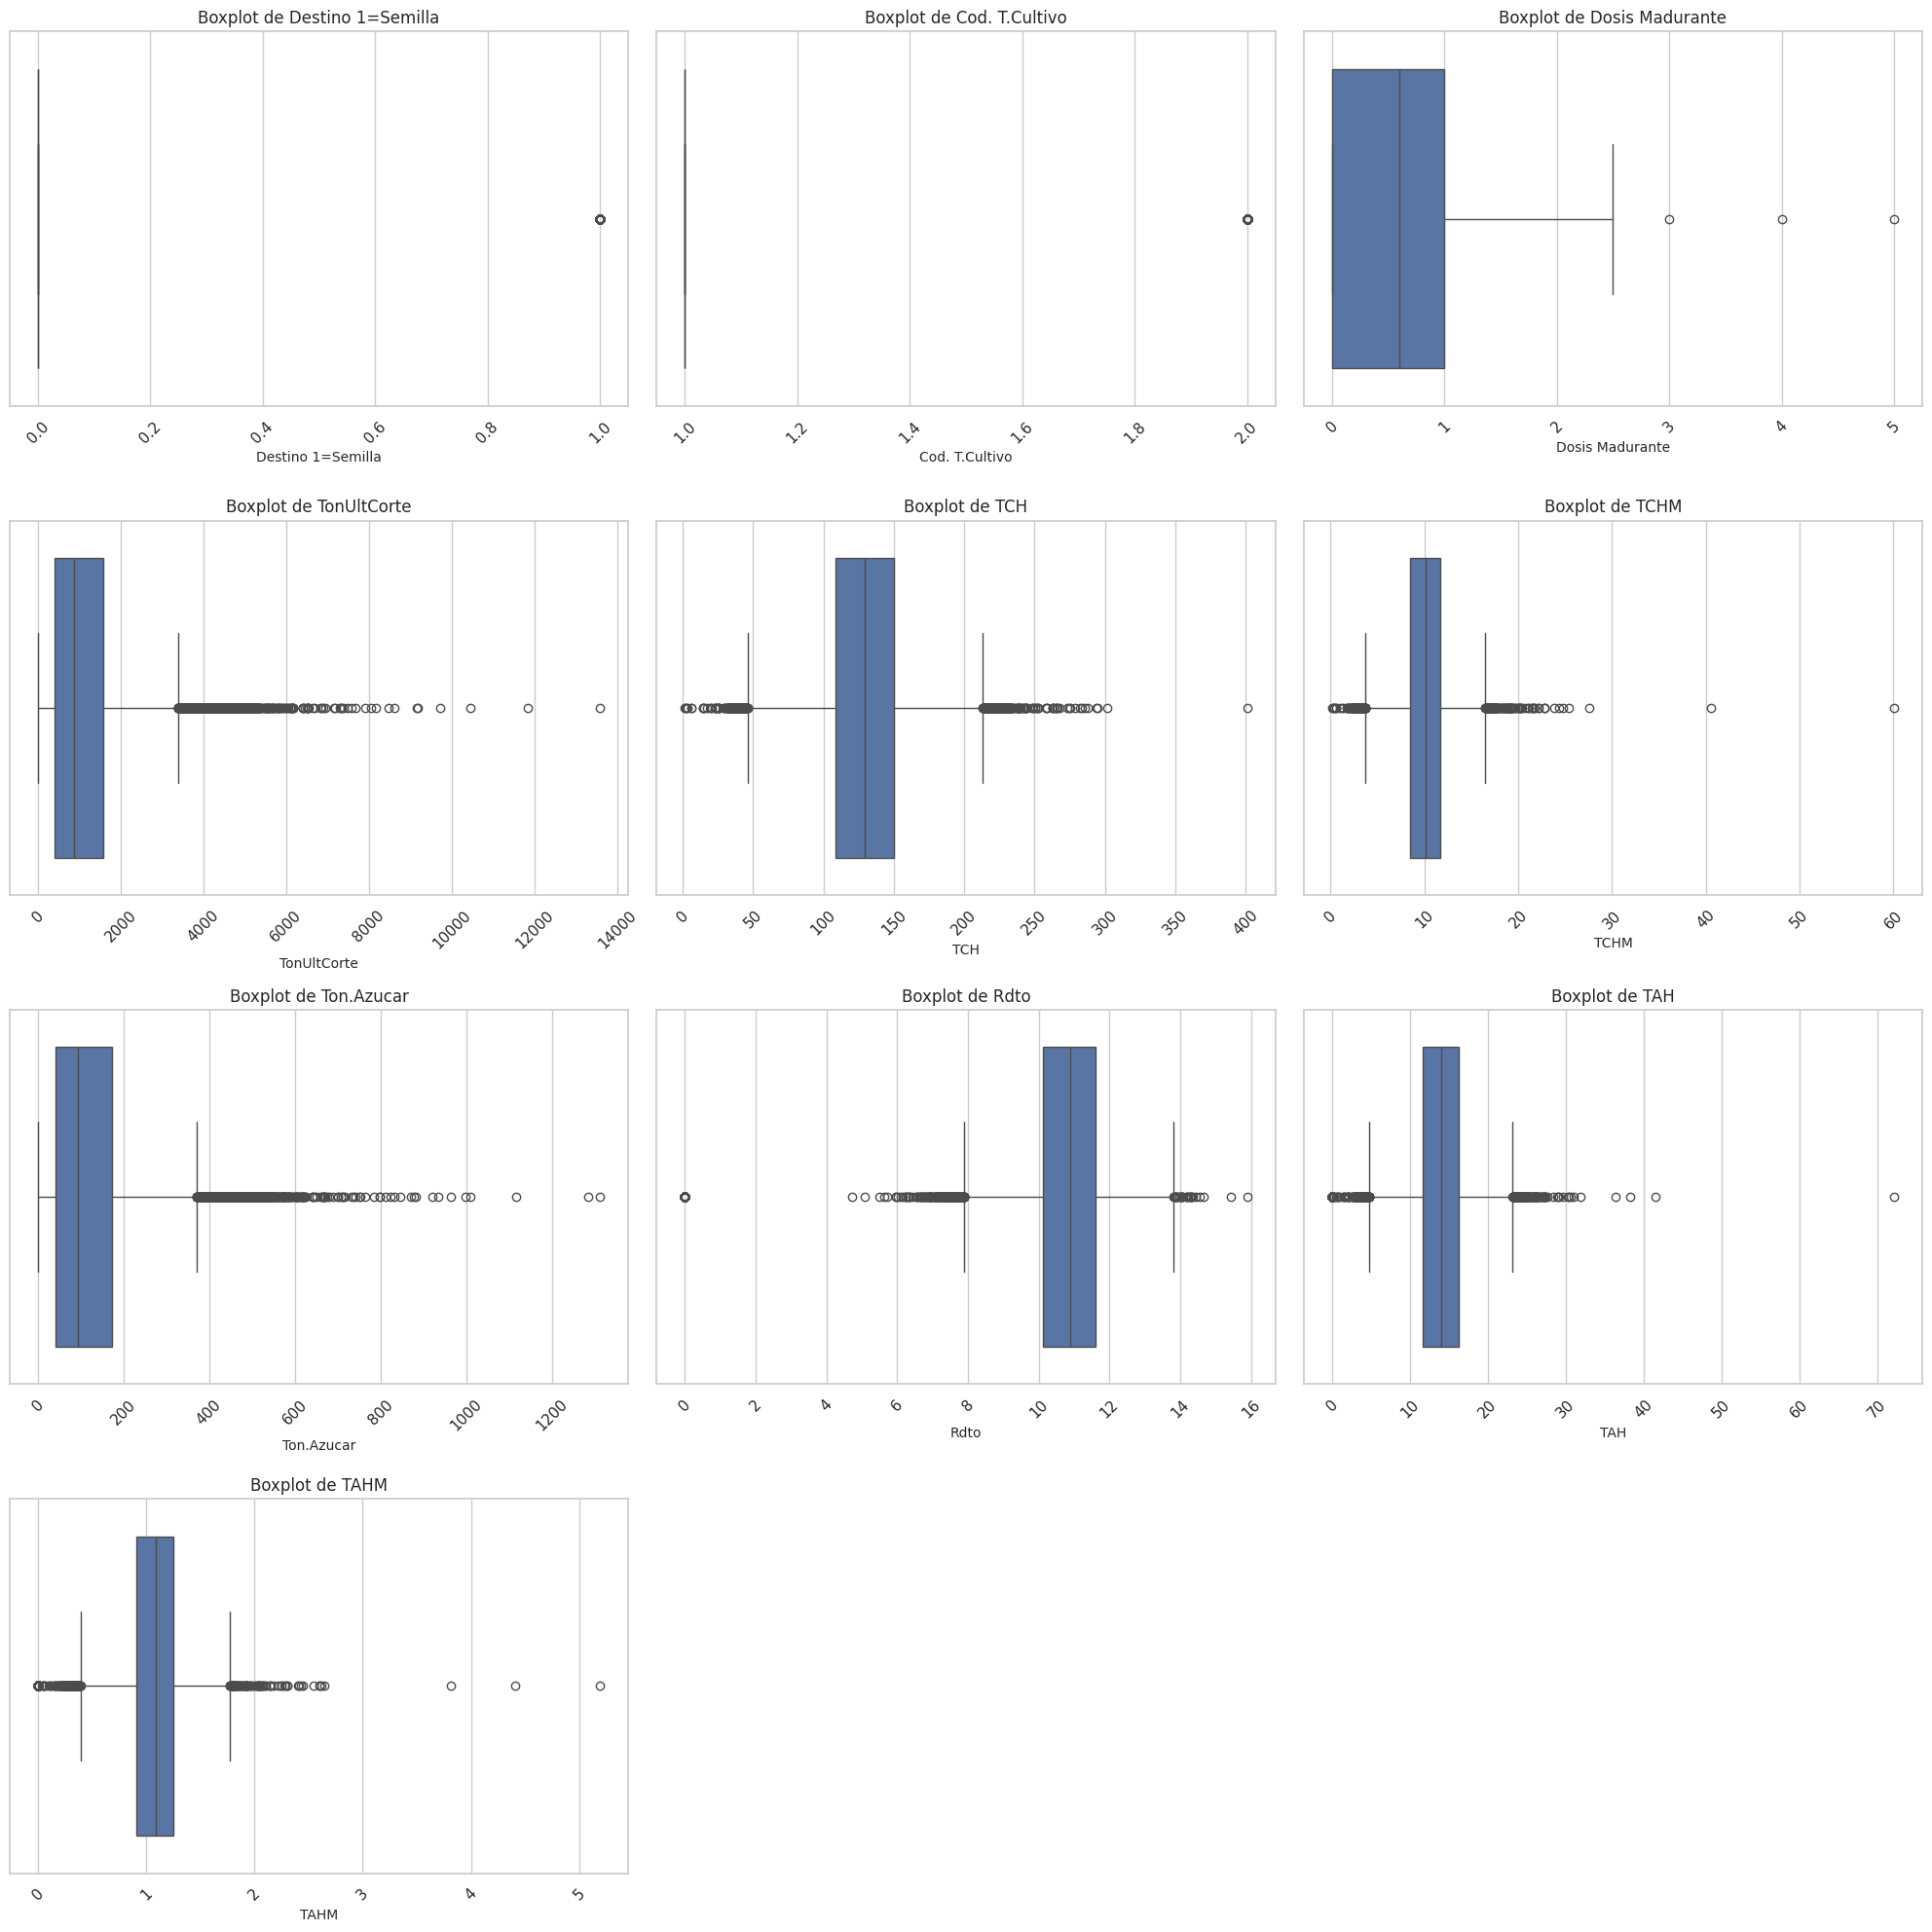

In [ ]:
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()
for i, col in enumerate(Xn.columns):
    sns.boxplot(x=Xn[col], ax=axes[i])  # Corrección: usar solo 'x'
    axes[i].set_title(f"Boxplot de {col}", fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

si se analisan las graficas de F.ULT.Corte en general se puede decir que tiene un balance entre sus datos si se observa la distibucion de año y mes.

si se observa los cortes de tiempo que hay homogenidad en las fechas de corte con uno que otro evento inusal por lo menos una vez durente el año.

se observa en la grafica de cortes por año que durante el perido de la pandemia hubo un cambio en el comportamiento, con respecto a la tendecia de años anteriores

en las graficas de corte por mes se observa que no tiene una estabilidad muy marcada. en comparacion por dias es mas uniforme.

en general los datos no estan marcando una tendencia especifica de tiempo que marque una caracteristica relevante en la predicion de la producion.

<ipython-input-49-6c50a16d66bd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Año_Corte"] = X["F.Ult.Corte"].dt.year
<ipython-input-49-6c50a16d66bd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Mes_Corte"] = X["F.Ult.Corte"].dt.month
<ipython-input-49-6c50a16d66bd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

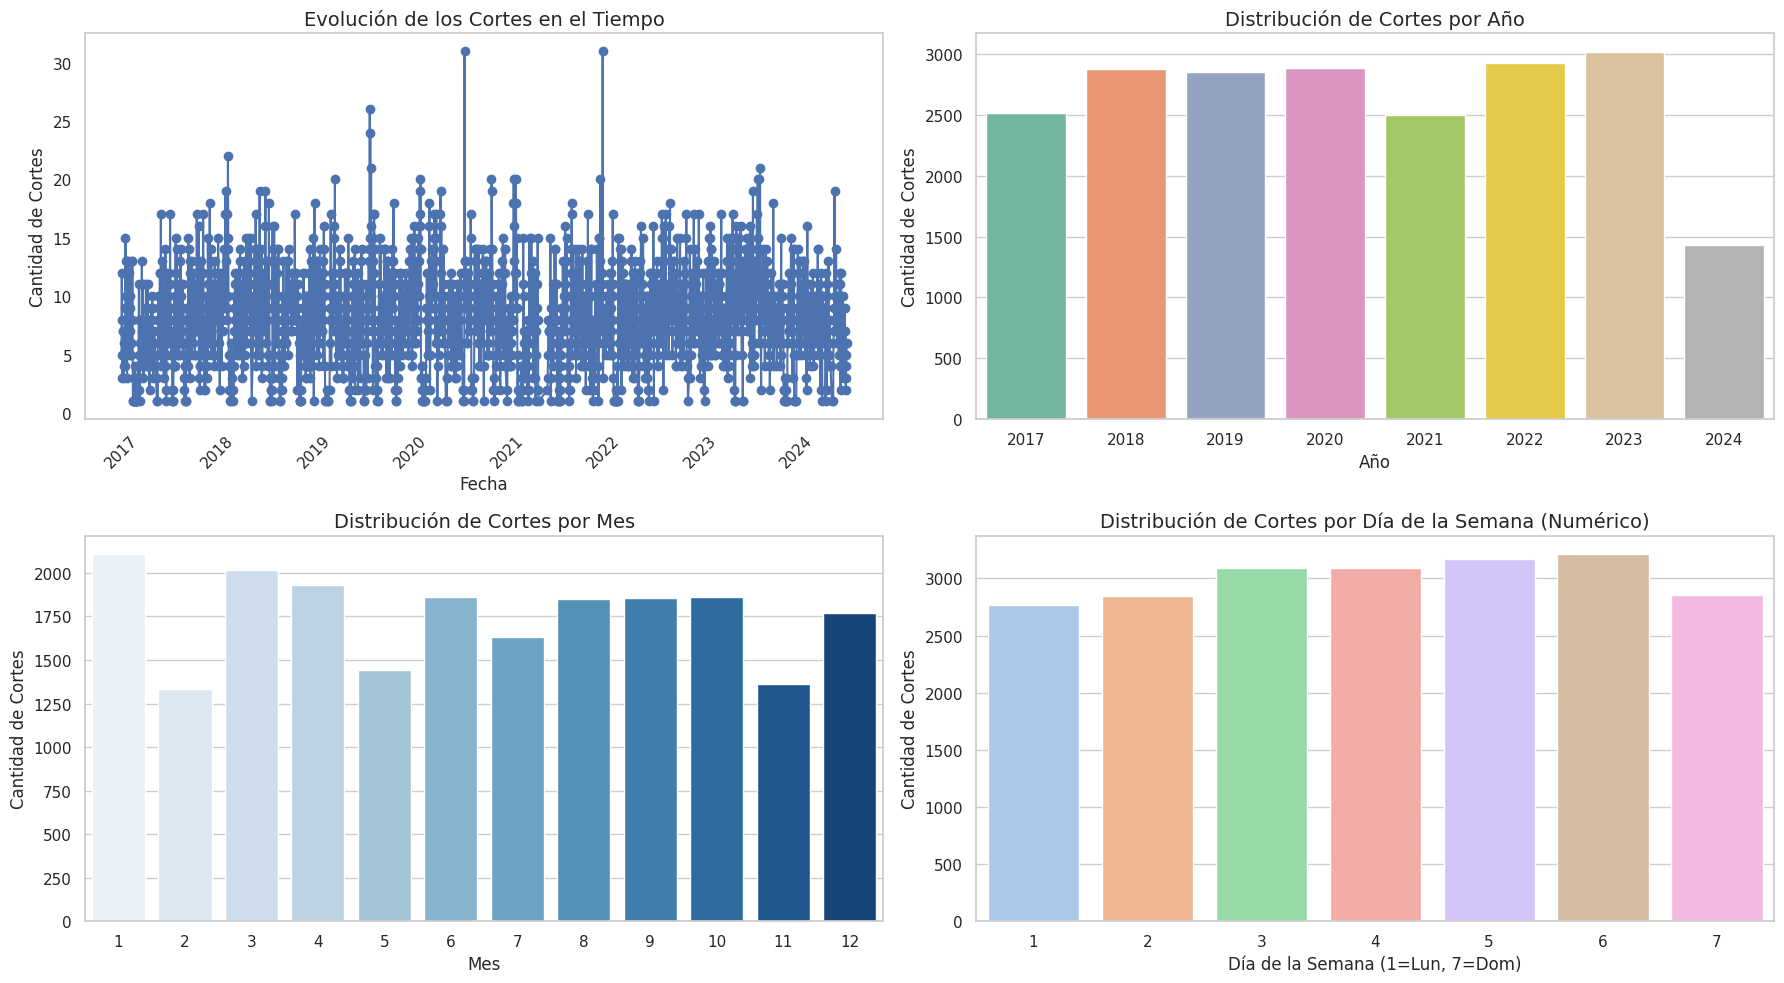

In [ ]:
# Contar la cantidad de cortes por fecha
X_fecha = X["F.Ult.Corte"].value_counts().sort_index()
X["Año_Corte"] = X["F.Ult.Corte"].dt.year
X["Mes_Corte"] = X["F.Ult.Corte"].dt.month
X["Dia_Semana_Num"] = X["F.Ult.Corte"].dt.weekday + 1  # Lunes=1, ..., Domingo=7
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
# Gráfico 1: Evolución en el tiempo
axes[0, 0].plot(X_fecha.index, X_fecha.values, marker='o', linestyle='-', color='b')
axes[0, 0].set_title("Evolución de los Cortes en el Tiempo", fontsize=14)
axes[0, 0].set_xlabel("Fecha", fontsize=12)
axes[0, 0].set_ylabel("Cantidad de Cortes", fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid()
# Gráfico 2: Distribución por Año
sns.countplot(data=X, x="Año_Corte", palette="Set2", ax=axes[0, 1])
axes[0, 1].set_title("Distribución de Cortes por Año", fontsize=14)
axes[0, 1].set_xlabel("Año", fontsize=12)
axes[0, 1].set_ylabel("Cantidad de Cortes", fontsize=12)
# Gráfico 3: Distribución por Mes
sns.countplot(data=X, x="Mes_Corte", palette="Blues", ax=axes[1, 0])
axes[1, 0].set_title("Distribución de Cortes por Mes", fontsize=14)
axes[1, 0].set_xlabel("Mes", fontsize=12)
axes[1, 0].set_ylabel("Cantidad de Cortes", fontsize=12)
# Gráfico 4: Distribución por Día de la Semana (número)
sns.countplot(data=X, x="Dia_Semana_Num", palette="pastel", ax=axes[1, 1])
axes[1, 1].set_title("Distribución de Cortes por Día de la Semana (Numérico)", fontsize=14)
axes[1, 1].set_xlabel("Día de la Semana (1=Lun, 7=Dom)", fontsize=12)
axes[1, 1].set_ylabel("Cantidad de Cortes", fontsize=12)
plt.tight_layout()
plt.show()

El cultivo presenta un desbalance en sus clases Normal y Organico, siendo la clase normal la que predomina con un 96.4% de los registos en esta variable, se debe analiazar como se comporta con las variables dependientes.

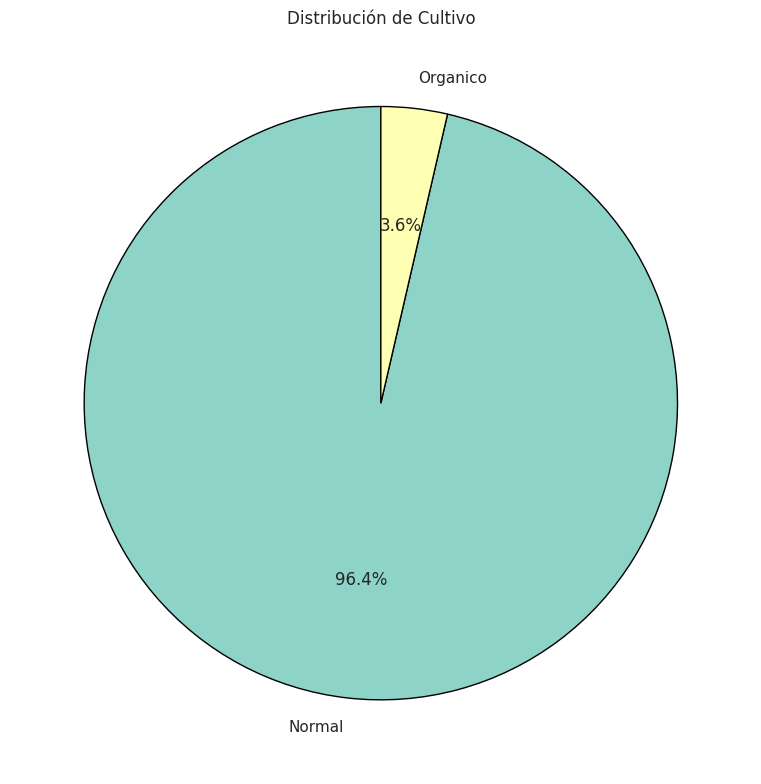

In [ ]:
plt.figure(figsize=(8, 8))
X['Cultivo'].value_counts().plot.pie(
    autopct='%1.1f%%',  # Mostrar porcentaje con 1 decimal
    startangle=90,      # Rotación inicial
    colors=plt.get_cmap("Set3").colors,  # Mejores colores
    wedgeprops={'edgecolor': 'black'}  # Bordes negros para mejor visibilidad
)
plt.title("Distribución de Cultivo")
plt.ylabel('')
plt.tight_layout()
plt.show()

Graficos para TCH:

esta es una de las varibles a predicir, se observa que tiene una distribucion aproxidamente normar con una ligera tendencia hacie la derecha en los valores altos.

Tiene presencia de datos atipos en sus dos extremos, que pueden tener un gran impacto en el modelo, ya que su extremo mas alto tiene dato de mas de 300 lo que lo aleja vastante de la mediana

en el histograma se observa una suave curva que representa la tendencia central, esto indica que la mayoria de los datos se centran alrededor del grupo de 100 a 150, sugeriendo una distribucion aproximademente normal.

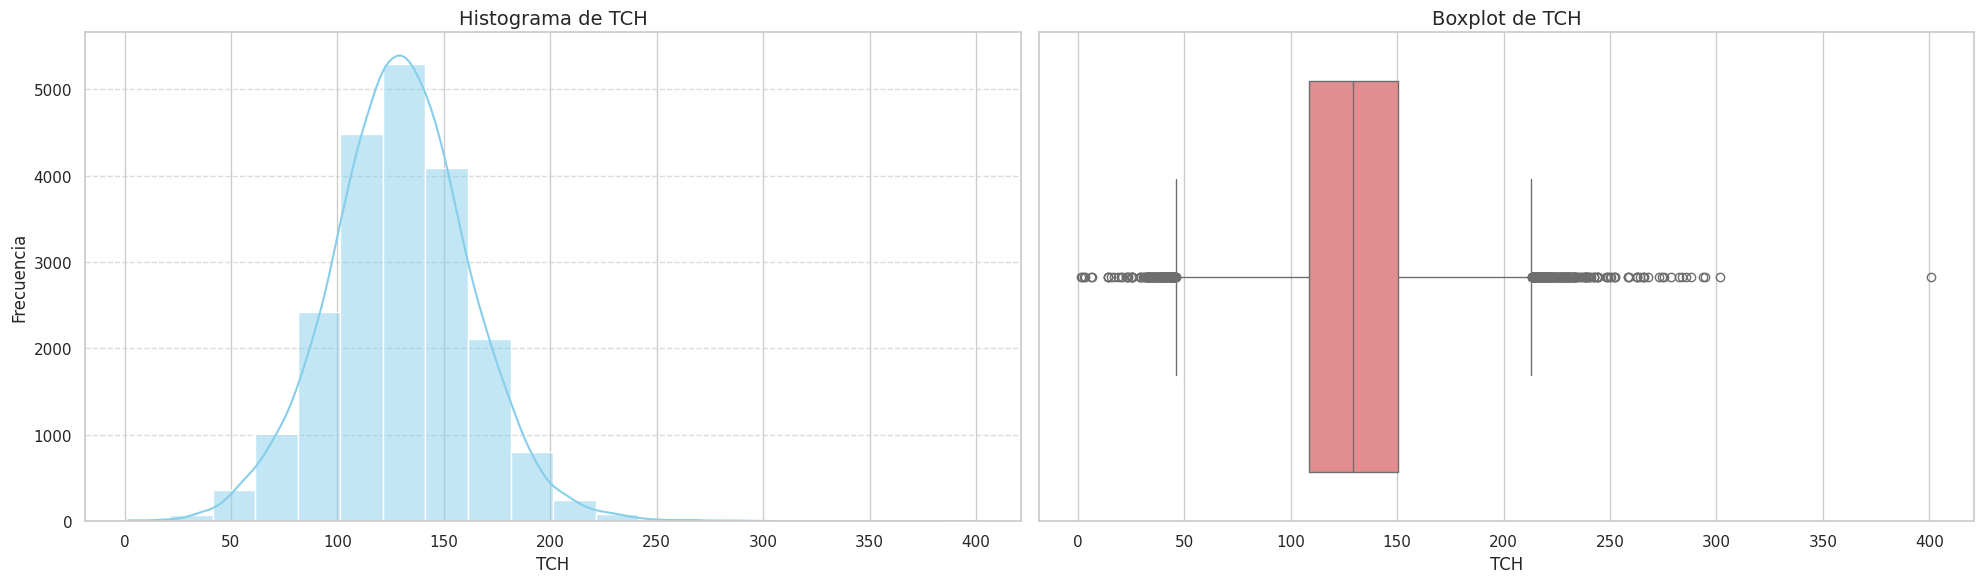

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.histplot(X['TCH'], bins=20, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title("Histograma de TCH", fontsize=14)
axes[0].set_xlabel("TCH", fontsize=12)
axes[0].set_ylabel("Frecuencia", fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
sns.boxplot(x=X['TCH'], color='lightcoral', ax=axes[1])
axes[1].set_title("Boxplot de TCH", fontsize=14)
axes[1].set_xlabel("TCH", fontsize=12)
plt.tight_layout()
plt.show()

Analisis Bivariado

In [68]:
f

,F.Ult.Corte,Destino 1=Semilla,Cod. T.Cultivo,Cultivo,Dosis Madurante,TonUltCorte,TCH,TCHM,Ton.Azucar,Rdto,TAH,TAHM
0,2017-01-02,0,1.0,Normal,1.0,727.190,121.198333,9.461228,86.050,11.8332,14.341666,1.119567
1,2017-01-02,0,1.0,Normal,0.0,136.000,93.793103,8.419488,14.728,10.8294,10.157241,0.911781
2,2017-01-02,0,1.0,Normal,1.1,1436.620,174.347087,14.151549,145.268,10.1117,17.629611,1.430974
3,2017-01-02,0,1.0,Normal,0.0,143.630,136.790476,13.972469,13.517,9.4109,12.873333,1.314947
4,2017-01-02,0,1.0,Normal,0.0,512.200,113.068432,9.806455,42.505,8.2985,9.383002,0.813790
...,...,...,...,...,...,...,...,...,...,...,...,...
21022,2024-07-10,0,2.0,Organico,0.0,517.340,172.446666,14.827744,NaN,NaN,NaN,NaN
21023,2024-07-10,0,2.0,Organico,0.0,132.460,108.573770,9.131519,NaN,NaN,NaN,NaN
21024,2024-07-10,0,2.0,Organico,0.0,269.745,145.808108,12.263087,NaN,NaN,NaN,NaN
21025,2024-07-10,0,2.0,Organico,0.0,4513.115,143.638287,12.276776,NaN,NaN,NaN,NaN


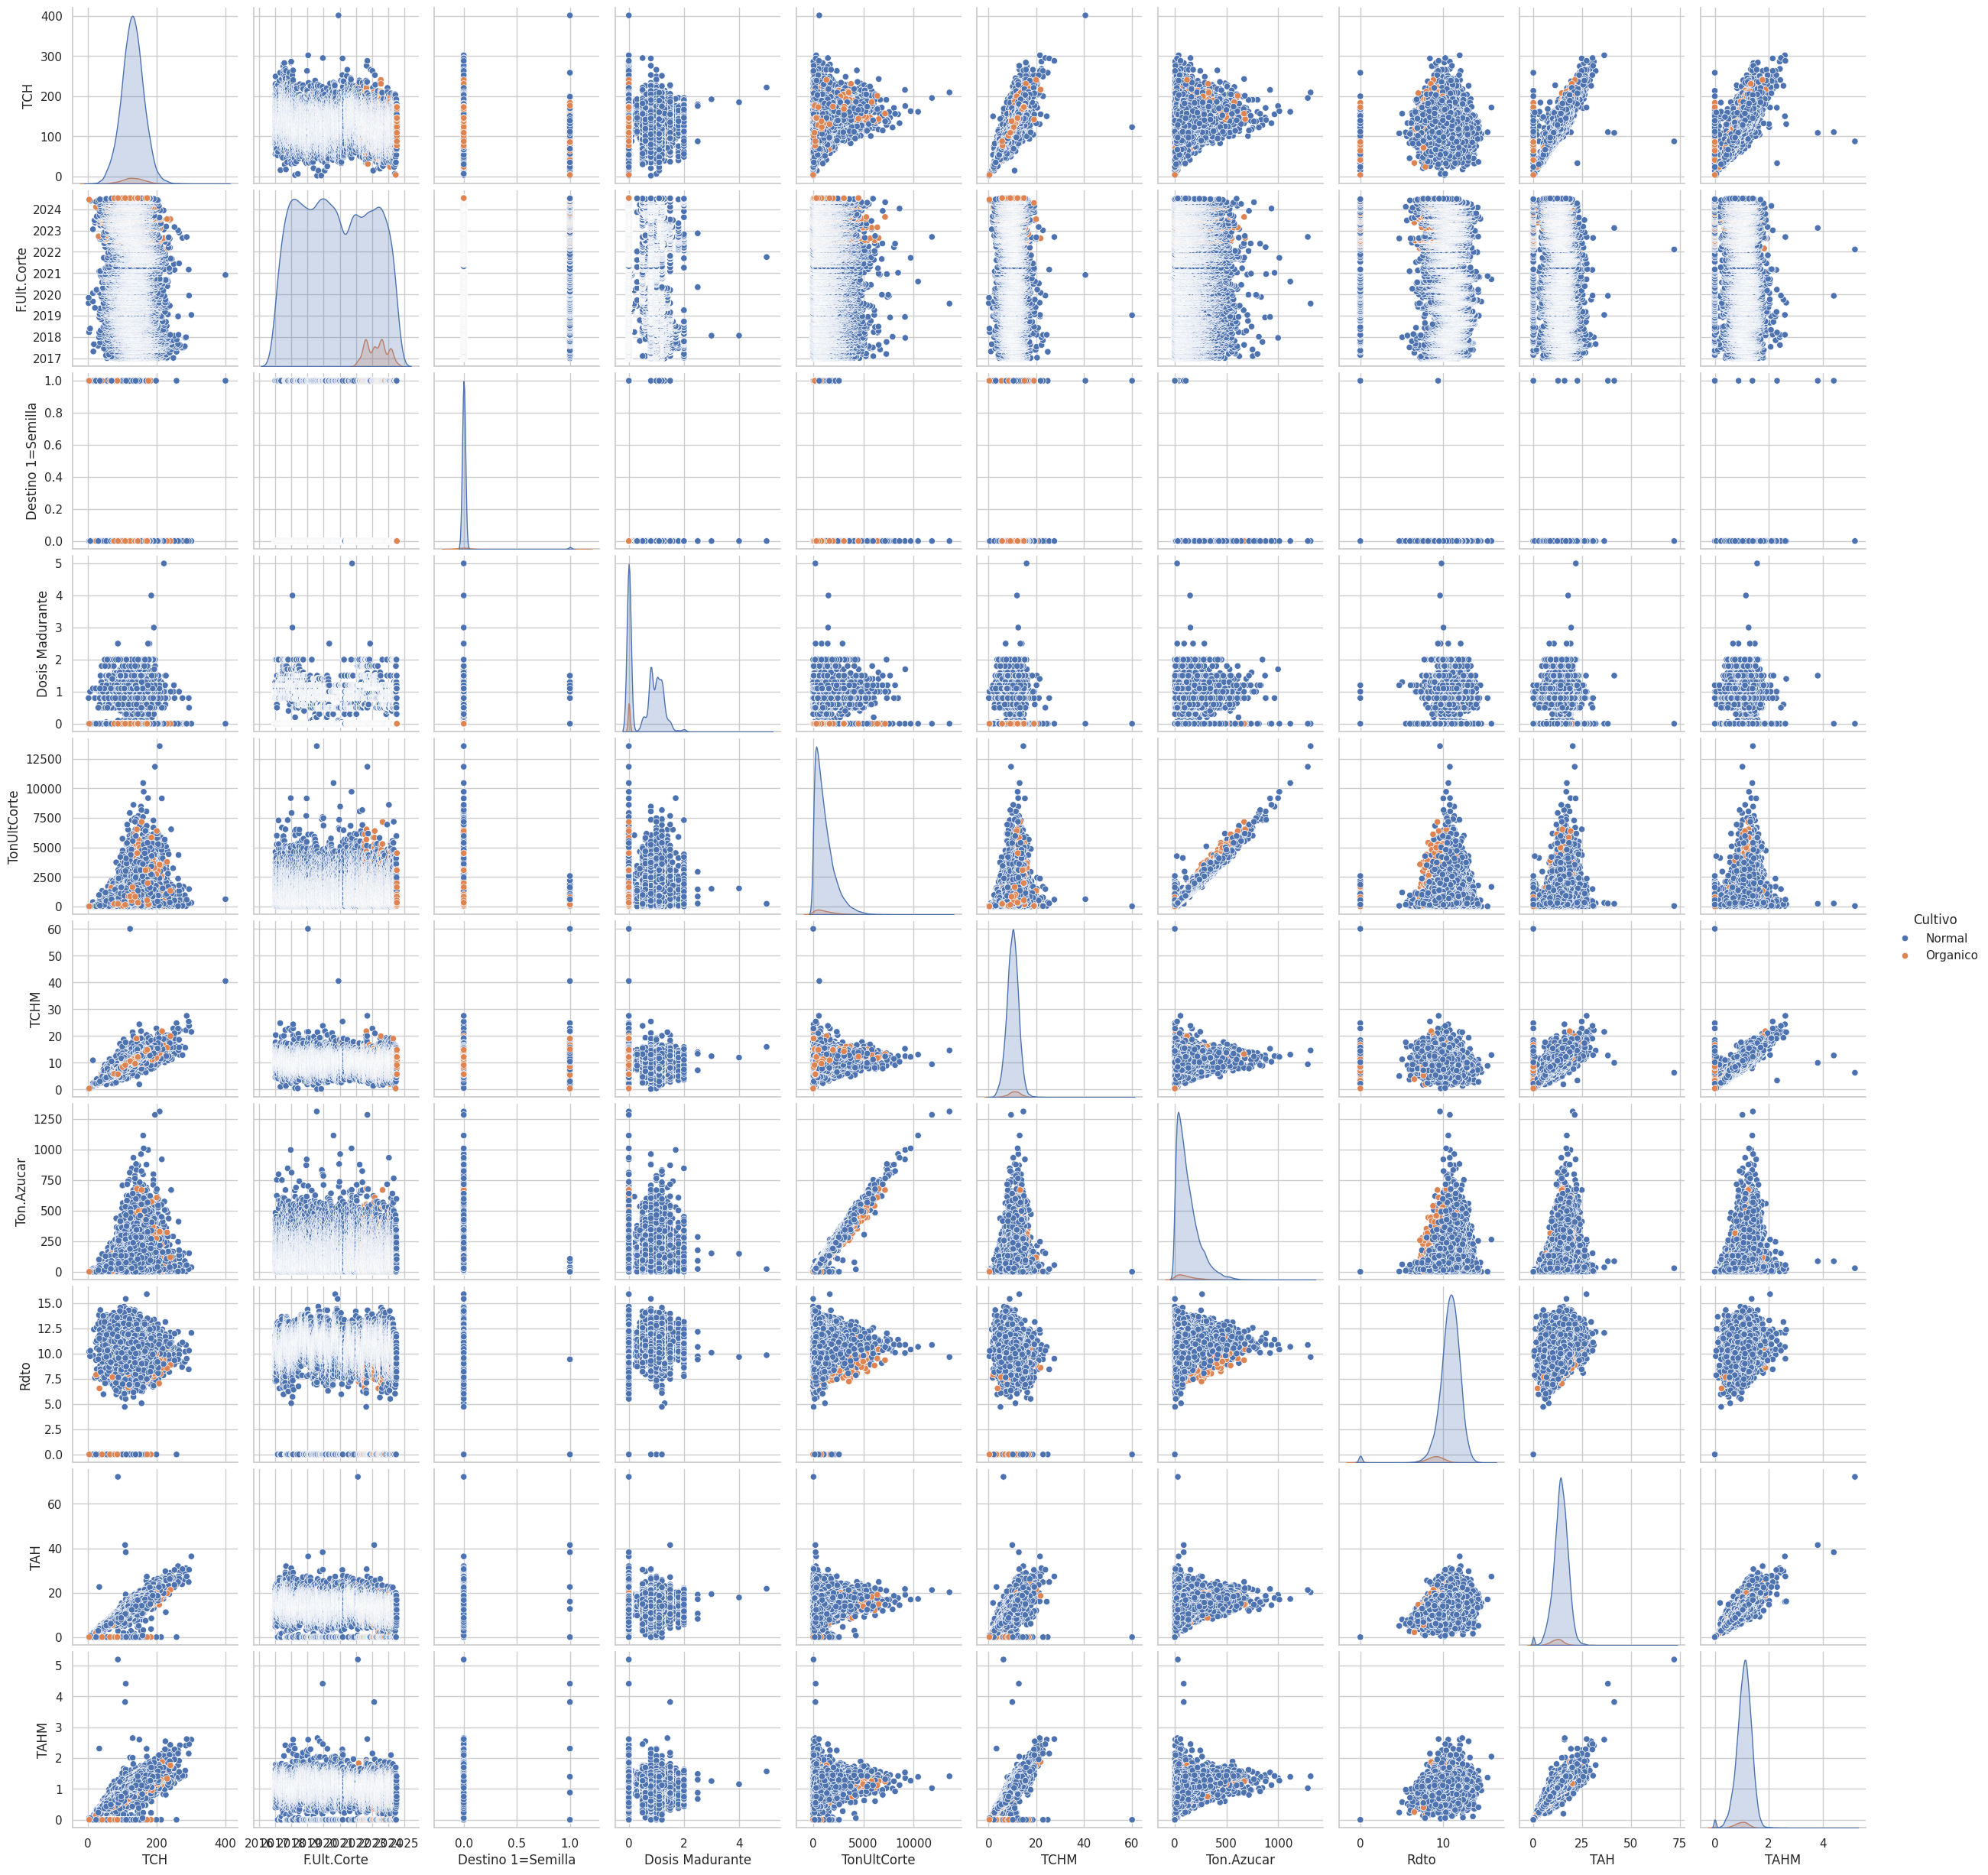

In [70]:
# prompt: de el dataframe f sacar un grafico que muestre la realcion de TCH cada variable dentro de el

import matplotlib.pyplot as plt
# Create a pairplot to visualize the relationship between TCH and other variables.
sns.pairplot(f, vars=['TCH', 'F.Ult.Corte', 'Destino 1=Semilla', 'Dosis Madurante', 'TonUltCorte', 'TCHM', 'Ton.Azucar', 'Rdto', 'TAH', 'TAHM'], hue='Cultivo')
plt.show()


<ipython-input-65-7b4822dedc14>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(X, x='Destino 1=Semilla', y='Cultivo', inner='box', palette='Dark2')


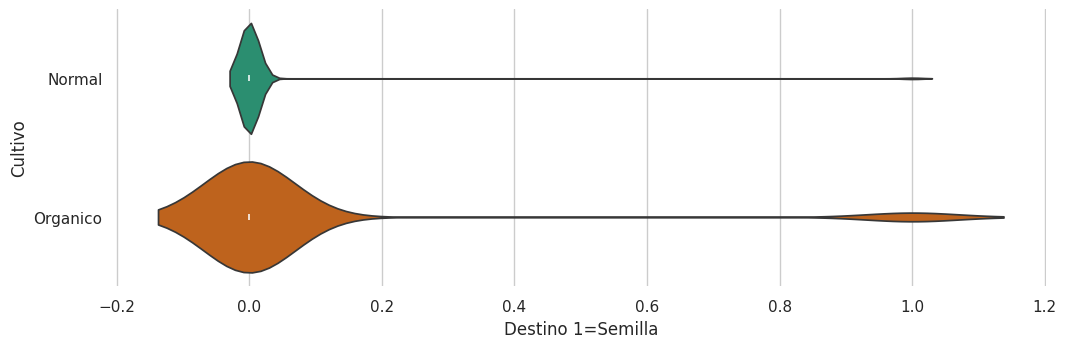

In [65]:
# @title Cultivo vs Destino 1=Semilla

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(X['Cultivo'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(X, x='Destino 1=Semilla', y='Cultivo', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-64-9e305153acb1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(X, x='TonUltCorte', y='Cultivo', inner='box', palette='Dark2')


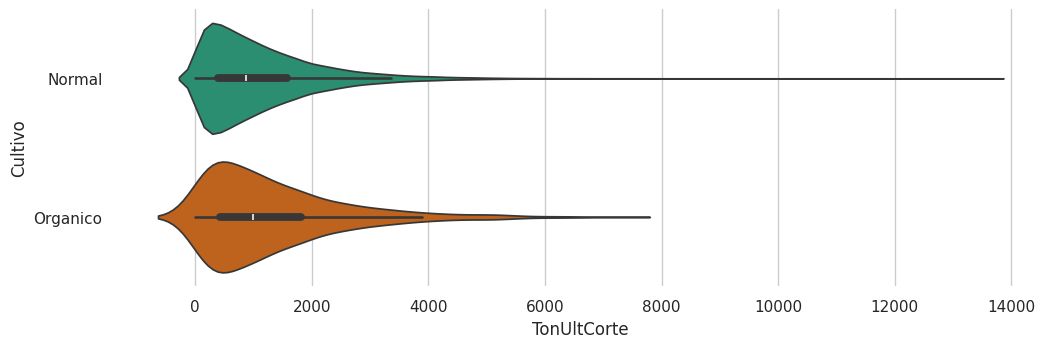

In [64]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(X['Cultivo'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(X, x='TonUltCorte', y='Cultivo', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-61-fd4a6638e8b1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(X, x='Dosis Madurante', y='Cultivo', inner='box', palette='Dark2')


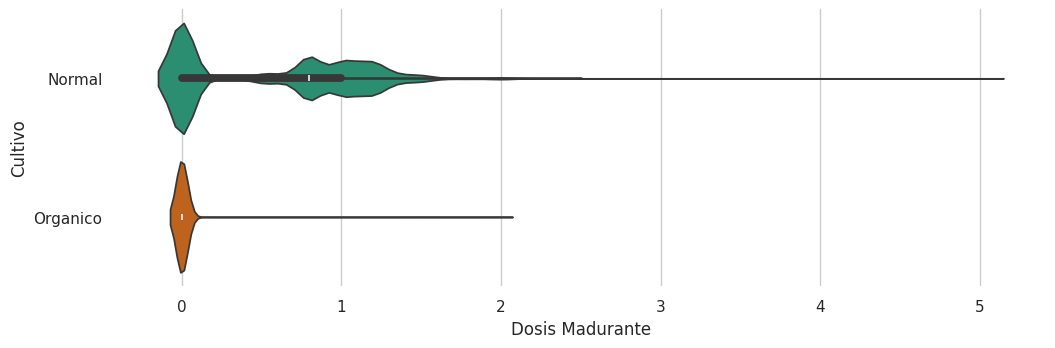

In [61]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(X['Cultivo'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(X, x='Dosis Madurante', y='Cultivo', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

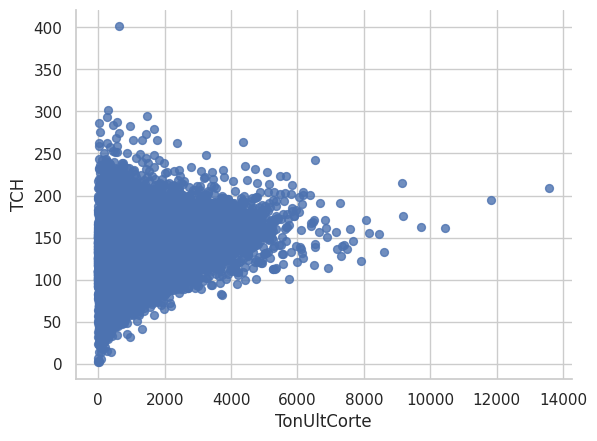

In [59]:
from matplotlib import pyplot as plt
X.plot(kind='scatter', x='TonUltCorte', y='TCH', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

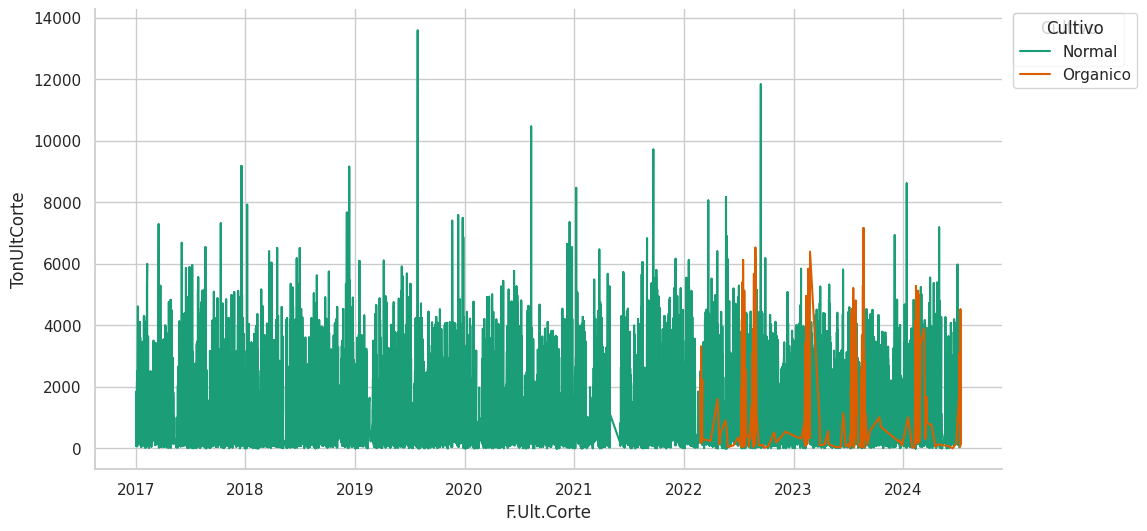

In [58]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['F.Ult.Corte']
  ys = series['TonUltCorte']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = X.sort_values('F.Ult.Corte', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Cultivo')):
  _plot_series(series, series_name, i)
  fig.legend(title='Cultivo', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('F.Ult.Corte')
_ = plt.ylabel('TonUltCorte')